In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math, random

In [2]:
%matplotlib inline

In [3]:
env = gym.make("MountainCarContinuous-v0")

In [4]:
env.observation_space.shape, env.observation_space.low, env.observation_space.high

((2,), array([-1.2 , -0.07]), array([0.6 , 0.07]))

In [5]:
def featurize_state(state):
    return np.array([state[0], state[0]**2, state[0]**3, state[0]**4, state[0]**5,
                    state[1], state[1]**2, state[1]**3, state[1]**4, state[1]**5])

In [6]:
def actions(env):
    return np.linspace(env.action_space.low, env.action_space.high, 10)

In [7]:
state = env.observation_space.sample()
state = featurize_state(state)

def init_weights():
    state = env.observation_space.sample()
    state = featurize_state(state)
    return np.random.uniform(-1/np.sqrt(state.shape[0]),
                            1/np.sqrt(state.shape[0]),
                            (actions(env).shape[0], state.shape[0]))

def q(state, action_idx):
    state = featurize_state(state)
    return np.dot(weights[action_idx], state)

In [8]:
num_actions = len(actions(env))
def select_action(state, greedy=0.2):
    state = featurize_state(state)
    max_arg = np.dot(weights, state).argmax()
    
    policy = np.full(num_actions, greedy/num_actions)
    policy[max_arg] = 1 - greedy + greedy/num_actions
    
    return np.random.choice(np.arange(num_actions), p=policy)

In [44]:
state = env.reset()
weights = init_weights()
action = None
done = False

In [47]:
lr = learning_rate = 0.01
df = discount_factor = 0.9
n = 3

episodes = []
iterations = []

for i in range(1):
    count = 0
    state = env.reset()
    done = False
    action = None
    T = float("inf")
    tau = float("-inf")
    t = 0
    rewards = []
    done_hitted = False
    
    while tau != T - 1:
        count += 1
        # if count >= 300: raise Exception("yay")
        if action is None:
            action = select_action(state)

        next_state, reward, done, _ = env.step([actions(env)[action]])
        if done and not done_hitted:
            T = t + 1
            done_hitted = True
            
        next_action = select_action(next_state)
        
        tau = t - n + 1
        
        if tau >= 0:
            rs = rewards[tau+1:min(tau+n, T)]
            G = sum([r*df**idx for idx, r in enumerate(rs)])
            if tau + n < T: G = G + q(next_state, next_action)*df**n
                
            w = weights[action]
            w = w + lr*(G - q(state, action))*featurize_state(state)

            weights[action] = w

        action = next_action
        state = next_state
        env.render()
        t += 1
        
    episodes.append(i)
    iterations.append(count)
    env.render()

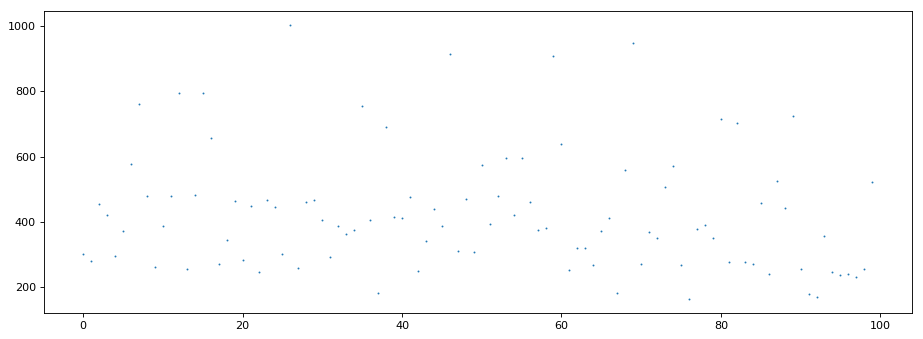

In [37]:
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(episodes, iterations, s=0.5)
#plt.hist(iterations, bins=100)
None

In [64]:
count, weights

(202, array([[-0.13383668, -0.26133253, -0.18449042,  0.08677108,  0.06254631,
         -0.15061691,  0.16906858, -0.06251222,  0.07983635, -0.14186024],
        [-0.05345007, -0.03247772, -0.14748635, -0.174455  , -0.08724804,
         -0.18091682,  0.28122277,  0.06860553,  0.22778229,  0.19586654],
        [-0.09268782, -0.07004116, -0.02485723, -0.05054954, -0.07500264,
         -0.24865851,  0.08908225,  0.1064135 , -0.13726708, -0.26347313],
        [-0.00722484,  0.08859729,  0.07546832,  0.05640408,  0.00233169,
          0.06386022, -0.13256574,  0.30330713,  0.04238674,  0.13221169],
        [-0.01910994,  0.00648791, -0.1253033 , -0.081292  , -0.01100774,
         -0.15696131,  0.19084809,  0.11525576, -0.09798487, -0.05958179],
        [-0.1372828 , -0.20033466, -0.03238448, -0.05364915, -0.12932985,
          0.01981108,  0.05396511, -0.20613241, -0.07531075,  0.1247759 ],
        [-0.10363805, -0.25081688, -0.16896908,  0.24315942,  0.1815737 ,
         -0.14699275,  0.19

In [90]:
if False:
    np.save("weights", weights)

In [12]:
if False:
    weights = np.load("weights.npy")